<a href="https://colab.research.google.com/github/AlvaroUriel/idal_ia3/blob/main/Test_listar_dataset_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Analisis previo dataset


In [1]:
from  google.colab import drive
 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os
import numpy as np
import pandas as pd

In [3]:
train_path = '/content/drive/MyDrive/IA3/Datasets/Food-11/training'
test_path   ='/content/drive/MyDrive/IA3/Datasets/Food-11/evaluation'
val_path   = '/content/drive/MyDrive/IA3/Datasets/Food-11/validation'

In [4]:
class_names = ['Bread', 'Dairy product', 'Dessert', 'Egg', 'Fried food',
               'Meat', 'Noodles/Pasta', 'Rice', 'Seafood', 'Soup', 'Vegetable/Fruit']
class_names

['Bread',
 'Dairy product',
 'Dessert',
 'Egg',
 'Fried food',
 'Meat',
 'Noodles/Pasta',
 'Rice',
 'Seafood',
 'Soup',
 'Vegetable/Fruit']

In [5]:
#Creamos listas con todos los nombres de los ficheros 
train_files = [os.path.join(train_path,img) for img in os.listdir(train_path)]
test_files  = [os.path.join(test_path,img)  for img in os.listdir(test_path)]
val_files   = [os.path.join(val_path,img)   for img in os.listdir(val_path)]

In [6]:
#Observamos como estan nombrados los ficheros
print(train_files[0])
print(test_files[0])
print(val_files[0])

/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_869.jpg
/content/drive/MyDrive/IA3/Datasets/Food-11/evaluation/9_242.jpg
/content/drive/MyDrive/IA3/Datasets/Food-11/validation/9_213.jpg


In [7]:
#Creamos listas con la clase del fichero, para cada fichero
train_y = [int(img.split("/")[-1].split("_")[0]) for img in train_files]
test_y  = [int(img.split("/")[-1].split("_")[0]) for img in test_files]
val_y   = [int(img.split("/")[-1].split("_")[0]) for img in val_files]


In [8]:
#Creamos un diccionario para unir las rutas y su clase
d_train_y = {'Rutas':train_files,'Clases':train_y}
d_test_y  = {'Rutas':test_files, 'Clases':test_y}
d_val_y   = {'Rutas':val_files,  'Clases':val_y}

In [9]:
#Convertimos el diccionario a un dataFrame de pandas
df_train_y = pd.DataFrame(d_train_y)
df_test_y  = pd.DataFrame(d_test_y)
df_val_y   = pd.DataFrame(d_val_y)

df_train_y.head(4)

,Rutas,Clases
0,/content/drive/MyDrive/IA3/Datasets/Food-11/tr...,0
1,/content/drive/MyDrive/IA3/Datasets/Food-11/tr...,0
2,/content/drive/MyDrive/IA3/Datasets/Food-11/tr...,0
3,/content/drive/MyDrive/IA3/Datasets/Food-11/tr...,0


In [10]:
#Observamos si las clases estan balanceadas en cuanto a número de muestras
print(df_train_y["Clases"].value_counts())
print( df_test_y["Clases"].value_counts())
print(  df_val_y["Clases"].value_counts())

9     1501
2     1501
5     1325
0      996
3      987
8      856
4      848
10     709
6      441
1      429
7      280
Name: Clases, dtype: int64
9     500
2     500
5     432
0     368
3     335
8     303
4     287
10    231
1     148
6     147
7      96
Name: Clases, dtype: int64
9     500
2     500
5     449
0     362
8     347
3     327
4     326
10    232
6     147
1     144
7      96
Name: Clases, dtype: int64


In [11]:
#De la celda anterior podemos ver que no, que hay clases con mas muestras que otras

In [12]:
#Observemos ahora si estan balanceadas las divisiones, train, test y val
total_clases = df_train_y["Clases"].value_counts()+df_test_y["Clases"].value_counts()+df_val_y["Clases"].value_counts()

for index, value in df_train_y["Clases"].value_counts().items():
  print (str(index).zfill(2), str(total_clases[index]).zfill(4),
         '{0:.4f}'.format(df_train_y["Clases"].value_counts()[index] / total_clases[index]),
          '{0:.4f}'.format(df_test_y["Clases"].value_counts()[index] / total_clases[index]),
           '{0:.4f}'.format(df_val_y["Clases"].value_counts()[index] / total_clases[index]))

09 2501 0.6002 0.1999 0.1999
02 2501 0.6002 0.1999 0.1999
05 2206 0.6006 0.1958 0.2035
00 1726 0.5771 0.2132 0.2097
03 1649 0.5985 0.2032 0.1983
08 1506 0.5684 0.2012 0.2304
04 1461 0.5804 0.1964 0.2231
10 1172 0.6049 0.1971 0.1980
06 0735 0.6000 0.2000 0.2000
01 0721 0.5950 0.2053 0.1997
07 0472 0.5932 0.2034 0.2034


In [13]:
#De la celda anterior podemos ver que las divisiones train, test y val sí estan balenceadas
#independientemente de la clase en un (60,20,20) aproximadamente.

In [14]:
#Vamos a probar un clasificador con las clases 1, 3, 6
print(class_names[0])
print(class_names[1])
print(class_names[2])

Bread
Dairy product
Dessert


In [15]:
#Vamos a seleccionar solo n ficheros de cada clase para que esten las clases balanceadas
n_samples_val   = 4                       #20%
n_samples_test  = n_samples_val           #20%
n_samples_train = n_samples_val * 3       #60%

sel_clases=[0,1,2]

#Train
list_train = []
for cl in sel_clases:
  df_train_y_sort=df_train_y[df_train_y['Clases']==cl]
  list_train += df_train_y_sort.iloc[0:n_samples_train, 0].tolist()


list_test = []
for cl in sel_clases:
  df_test_y_sort=df_test_y[df_test_y['Clases']==cl]
  list_test += df_test_y_sort.iloc[0:n_samples_test, 0].tolist()

list_val = []
for cl in sel_clases:
  df_val_y_sort=df_val_y[df_val_y['Clases']==cl]
  list_val += df_val_y_sort.iloc[0:n_samples_val, 0].tolist()

list_train

['/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_869.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_767.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_359.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_36.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_379.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_916.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_413.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_203.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_338.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_174.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_29.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_876.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/1_146.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/1_193.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/1_63.jpg'

##2. Tramiento de datos


In [35]:
import random

import numpy as np
import matplotlib.pyplot as plt; 

# Keras
from keras.utils import np_utils
from keras.preprocessing.image import load_img, img_to_array
from keras.applications import imagenet_utils
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D

from sklearn.metrics import confusion_matrix, accuracy_score

In [17]:
# istas con todos los nombres de los ficheros 
len(list_train),len(list_test),len(list_val)

(36, 12, 12)

In [18]:
#Troceamos por la ultima '/' y por '_' para quedarnos el primer numero y lo pasamos a entero
train_y = [int(img.split("/")[-1].split("_")[0]) for img in list_train]
test_y = [int(img.split("/")[-1].split("_")[0]) for img in list_test]
val_y = [int(img.split("/")[-1].split("_")[0]) for img in list_val]

num_classes = len(sel_clases)

#One hot encoding para tener las etiquetas
y_train = np_utils.to_categorical(train_y, num_classes)
y_val = np_utils.to_categorical(val_y, num_classes)
y_test = np_utils.to_categorical(test_y, num_classes)

y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

Datos de entrenamiento en:  3 clases
[12, 12, 12]


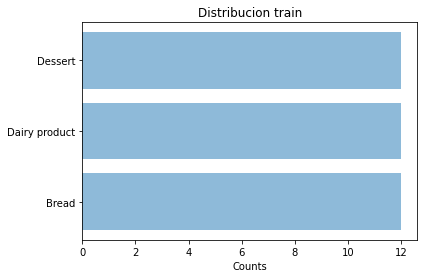

In [19]:
print("Datos de entrenamiento en: ", num_classes, "clases")
print([train_y.count(i) for i in range(num_classes)])
 
food_classes=[]
for name in sel_clases:
  food_classes+=[class_names[name]]
 
y_pos = np.arange(len(food_classes))
counts = [train_y.count(i) for i in range(num_classes)]
 
plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, food_classes)
plt.xlabel('Counts')
plt.title('Distribucion train')
 
plt.show()

Datos de test en:  3 clases
[4, 4, 4]


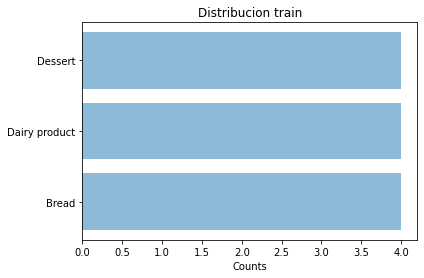

In [20]:
print("Datos de test en: ", num_classes, "clases")
print([test_y.count(i) for i in range(num_classes)])
 
food_classes=[]
for name in sel_clases:
  food_classes+=[class_names[name]]
 
y_pos = np.arange(len(food_classes))
counts = [test_y.count(i) for i in range(num_classes)]
 
plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, food_classes)
plt.xlabel('Counts')
plt.title('Distribucion train')
 
plt.show()

Datos de validacion en:  3 clases
[4, 4, 4]


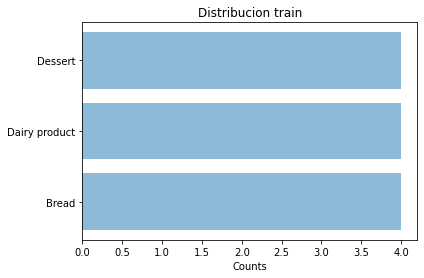

In [21]:
print("Datos de validacion en: ", num_classes, "clases")
print([val_y.count(i) for i in range(num_classes)])
 
food_classes=[]
for name in sel_clases:
  food_classes+=[class_names[name]]
 
y_pos = np.arange(len(food_classes))
counts = [val_y.count(i) for i in range(num_classes)]
 
plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, food_classes)
plt.xlabel('Counts')
plt.title('Distribucion train')
 
plt.show()

In [22]:
random.randint(0,10)

5

In [23]:
#Clase para mostrar imagenes
def show_imgs(X):
    plt.figure(figsize=(8, 8))
    
#   k = 0
    for i in range(0,3):
        for j in range(0,3):
            k = random.randint(0, len(X)-1)
            image = load_img(X[k], target_size=(224, 224))
            ax = plt.subplot2grid((4,4),(i,j))  
            ax.set_title('Clase: ' + str(train_y[k]) )     
            plt.imshow(image)            
#           k = k+1
    #Muestra
    plt.show()

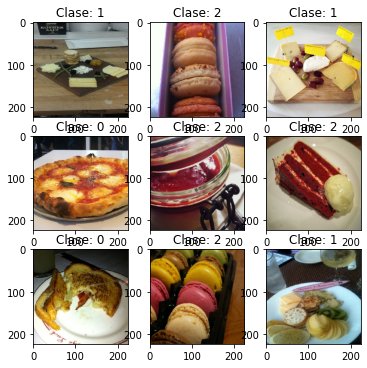

In [24]:
show_imgs(list_train)

In [25]:
def create_features(dataset):
 
    x_scratch = []

    k=0

    #Bucle sobre las imagenes
    for imagePath in dataset:
 
        #Se cargan las imagenes a tamaño 224
        image = load_img(imagePath, target_size=(224, 224))
        image = img_to_array(image)
 
        # preprocess the image by (1) expanding the dimensions and
        # (2) subtracting the mean RGB pixel intensity from the
        # ImageNet dataset
        image = np.expand_dims(image, axis=0)
        image = imagenet_utils.preprocess_input(image)
 
        # add the image to the batch
        x_scratch.append(image)

        k = k+1
        print('convertida:', k, ' de ', len(dataset))
 
    x = np.vstack(x_scratch)
    return x

In [26]:
train_x = create_features(list_train)
val_x   = create_features(list_val)
test_x  = create_features(list_test)
print(train_x.shape)
print(val_x.shape)
print(test_x.shape)

convertida: 1  de  36
convertida: 2  de  36
convertida: 3  de  36
convertida: 4  de  36
convertida: 5  de  36
convertida: 6  de  36
convertida: 7  de  36
convertida: 8  de  36
convertida: 9  de  36
convertida: 10  de  36
convertida: 11  de  36
convertida: 12  de  36
convertida: 13  de  36
convertida: 14  de  36
convertida: 15  de  36
convertida: 16  de  36
convertida: 17  de  36
convertida: 18  de  36
convertida: 19  de  36
convertida: 20  de  36
convertida: 21  de  36
convertida: 22  de  36
convertida: 23  de  36
convertida: 24  de  36
convertida: 25  de  36
convertida: 26  de  36
convertida: 27  de  36
convertida: 28  de  36
convertida: 29  de  36
convertida: 30  de  36
convertida: 31  de  36
convertida: 32  de  36
convertida: 33  de  36
convertida: 34  de  36
convertida: 35  de  36
convertida: 36  de  36
convertida: 1  de  12
convertida: 2  de  12
convertida: 3  de  12
convertida: 4  de  12
convertida: 5  de  12
convertida: 6  de  12
convertida: 7  de  12
convertida: 8  de  12
conve

In [27]:
# Creating a checkpointer
checkpointer = ModelCheckpoint(filepath='scratchmodel.best.hdf5',
                               verbose=1,save_best_only=True)
# load the VGG16 network
print("[INFO loading network...")
model_vgg = VGG16(weights="imagenet", include_top=False, input_shape=train_x.shape[1:])
model_vgg.summary()

[INFO loading network...
58900480/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                     

In [28]:
model_transfer_full = Sequential()
model_transfer_full.add(model_vgg)
model_transfer_full.add(GlobalAveragePooling2D())
model_transfer_full.add(Dropout(0.2))
model_transfer_full.add(Dense(100, activation='relu'))
model_transfer_full.add(Dense(num_classes, activation='softmax'))
model_transfer_full.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 100)               51300     
                                                                 
 dense_1 (Dense)             (None, 3)                 303       
                                                                 
Total params: 14,766,291
Trainable params: 14,766,291
Non-trainable params: 0
____________________________________________

In [29]:
opt = Adam(learning_rate=0.00001)
model_transfer_full.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
history = model_transfer_full.fit(train_x, y_train, batch_size=32, epochs=10,
          validation_data=(val_x, y_val), callbacks=[checkpointer],verbose=1, shuffle=True)

Epoch 1/10
2/2 [==============================] - ETA: 0s - loss: 6.8468 - accuracy: 0.3056 
Epoch 1: val_loss improved from inf to 2.61185, saving model to scratchmodel.best.hdf5
2/2 [==============================] - 24s 5s/step - loss: 6.8468 - accuracy: 0.3056 - val_loss: 2.6119 - val_accuracy: 0.5000
Epoch 2/10
2/2 [==============================] - ETA: 0s - loss: 3.2844 - accuracy: 0.3889
Epoch 2: val_loss improved from 2.61185 to 2.24364, saving model to scratchmodel.best.hdf5
2/2 [==============================] - 2s 876ms/step - loss: 3.2844 - accuracy: 0.3889 - val_loss: 2.2436 - val_accuracy: 0.4167
Epoch 3/10
2/2 [==============================] - ETA: 0s - loss: 1.3584 - accuracy: 0.7778
Epoch 3: val_loss improved from 2.24364 to 2.16625, saving model to scratchmodel.best.hdf5
2/2 [==============================] - 2s 901ms/step - loss: 1.3584 - accuracy: 0.7778 - val_loss: 2.1663 - val_accuracy: 0.5000
Epoch 4/10
2/2 [==============================] - ETA: 0s - loss: 1.0

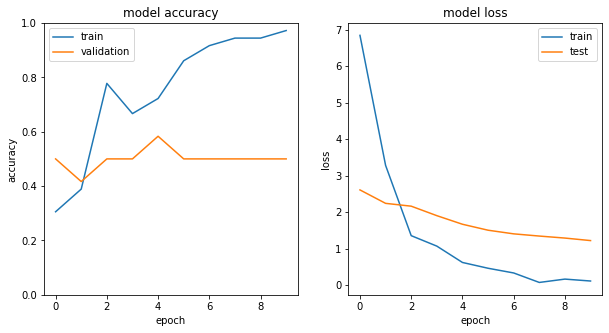

In [30]:
def plot_accuracy_loss(history):
    fig = plt.figure(figsize=(10,5))
 
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.ylim([0, 1])
 
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
 
plot_accuracy_loss(history)

In [36]:
preds = np.argmax(model_transfer_full.predict(test_x), axis=1)
print("\nAccuracy on Test Data: ", accuracy_score(test_y, preds))
print("\nNumber of correctly identified imgaes: ",
      accuracy_score(test_y, preds, normalize=False),"\n")
confusion_matrix(test_y, preds, labels=range(0,num_classes))


Accuracy on Test Data:  0.75

Number of correctly identified imgaes:  9 



array([[2, 1, 1],
       [0, 3, 1],
       [0, 0, 4]])